In [87]:
#import tensorflow and keras for neural network model
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [88]:
import numpy as np #better array manipulation
from PIL import Image #loading images
import os #to work with the computer OS


In [89]:
#this is a function to load the data and also pre process the data
def load_images(file, label):
    #create two lists to store the images and labels
    images = []
    labels = []
    #iterate through a loop to get the file names and import the images
    for f in os.listdir(file):
        img = Image.open(os.path.join(file, f))
        #resize the image. The same should be done in the main program when predicting the data from the model
        img = img.resize((200, 200))
        #converting to array
        img_array = np.array(img)
        images.append(img_array)
        labels.append(label)
    #return a list of the images and the labels
    return np.array(images), np.array(labels)

In [90]:
#file paths to the images
positive_face_file = 'test_images/face'
negative_face_file = 'test_images/no_face'

In [91]:
#here the images are loaded using the load_image() function. 
#labels, 1 is given for the images with faces
#0 is given for the images without faces
positive_face_images , positive_face_labels = load_images(positive_face_file, 1)
negative_face_images, negative_face_labels = load_images(negative_face_file, 0)

In [92]:
#lets merge all the labels and the images together
all_images = np.concatenate((positive_face_images, negative_face_images), axis = 0)
all_labels = np.concatenate((positive_face_labels, negative_face_labels), axis = 0)

In [93]:
#split them for training using the train_test_split. 
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

In [94]:
#Data Augmentation - used (rotation, zoom, flip and fill new pixels)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [95]:
datagen.fit(X_train)

In [96]:
#regularizer initialization
regularizer = tf.keras.regularizers.l2(0.01)
#model architecture - 3 conv layers and 3 max pooling layers
model = tf.keras.models.Sequential([
    #1st conv layer with filter size 32 and also filter matrix size of 3
    #input shape needs to be same as image size and since images are RGB, 3 is for 3 layers of RGB
    tf.keras.layers.Conv2D(filters =32,kernel_size=3,activation='relu', input_shape=(200, 200,3),  kernel_regularizer=regularizer),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters =64,kernel_size=3,activation='relu',  kernel_regularizer=regularizer),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters =128,kernel_size=3,activation='relu',  kernel_regularizer=regularizer),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    #flatten the conv layers
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu',  kernel_regularizer=regularizer),
    #output neuron/layer will have activation of sigmoid to get a value between 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [103]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 23, 23, 128)     

In [97]:
#optimizer Adam with custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#loss function with binary crossentropy
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
#train model with 15 epochs
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, validation_data=(X_test, y_test)) 

Epoch 1/15
75/75 [==============================] - 67s 876ms/step - loss: 27.7906 - accuracy: 0.7762 - val_loss: 3.6617 - val_accuracy: 0.8788
Epoch 2/15
75/75 [==============================] - 73s 971ms/step - loss: 3.3461 - accuracy: 0.8475 - val_loss: 2.9391 - val_accuracy: 0.8956
Epoch 3/15
75/75 [==============================] - 62s 826ms/step - loss: 2.7570 - accuracy: 0.8601 - val_loss: 2.4711 - val_accuracy: 0.9108
Epoch 4/15
75/75 [==============================] - 69s 921ms/step - loss: 2.3903 - accuracy: 0.8816 - val_loss: 2.1678 - val_accuracy: 0.9125
Epoch 5/15
75/75 [==============================] - 71s 948ms/step - loss: 2.1362 - accuracy: 0.8799 - val_loss: 1.9392 - val_accuracy: 0.9259
Epoch 6/15
75/75 [==============================] - 80s 1s/step - loss: 1.9448 - accuracy: 0.8879 - val_loss: 1.7707 - val_accuracy: 0.9125
Epoch 7/15
75/75 [==============================] - 67s 889ms/step - loss: 1.7964 - accuracy: 0.8862 - val_loss: 1.6609 - val_accuracy: 0.9276
E

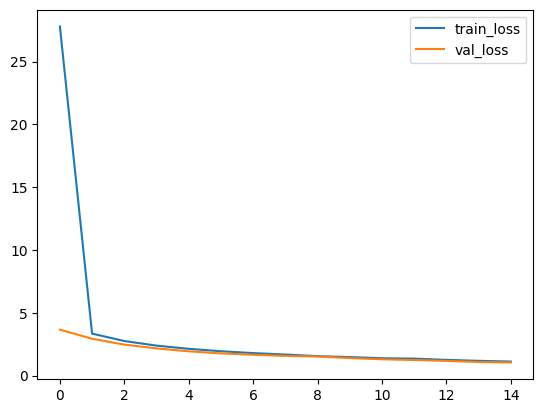

In [99]:
#ploting the loss curve to visualize the performance of the model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

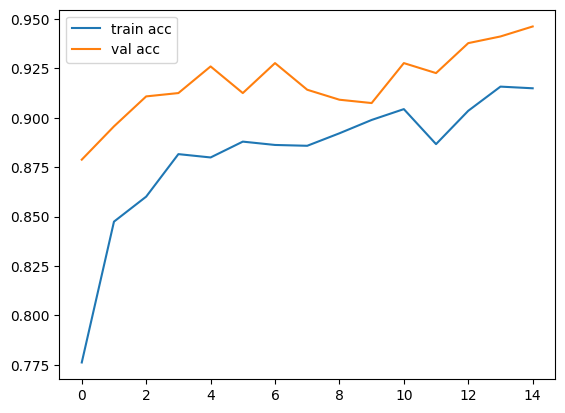

<Figure size 640x480 with 0 Axes>

In [100]:
#plotting the accuracy curve
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [104]:
#loss and accuracy of the model
loss , acc = model.evaluate(X_test, y_test)
print('loss', loss)
print('acc', acc)

19/19 [==============================] - 4s 199ms/step - loss: 1.0493 - accuracy: 0.9461
loss 1.0492563247680664
acc 0.9461279511451721


In [102]:
#save the model to be used in the program later to predict
model.save('face_detection_cnn.h5')